## 1- Learning in discrete graphical models
the way Z is presented, we see that :  $$Z \sim M(1,\pi) \quad \textrm{  (multinomial law)}$$
which can be represented by a vector Z such that $$ Z=m \iff Z=e_m=(0,0,....,1,...0)^T \quad \forall m \in [|1,M|]$$
and we have $p(z|\pi)=\prod_{k=1}^{M}\pi_k^{z_k}$
,now we can write the likelihood for $(z_1,z_2,...,z_n):$  
\begin{equation}
l_{(z_1,z_2,...,z_n)}(\pi)=\prod_{i=1}^n p(z_i|\pi) = \prod_{k=1}^M\pi_k^{\sum_{i=1}^nz_{ik}}\\
\end{equation}
and the loglikelihood is : $L(\pi)=\sum_{k=1}^M(\sum_{i=1}^n z_{ik}) log(\pi_k) $
.  maximizing the loglikelihood can be solved by solving the problem 
\begin{cases}
\max L(\pi)\\
under \space constraint : \\
\sum\pi_k=1
\end{cases}
we consider the Lagrange multiplier : $h(\pi)=L(\pi)+\lambda (1-\sum_{k=1}^M\pi_k)$
\begin{equation}
\frac{\partial h}{\partial \pi_k} = \frac{1}{\pi_k} \sum_{i=1}^n z_{ik} -\lambda = 0 \\ 
\implies \sum_{k=1}^M \pi_k \lambda=\sum_{k=1}^M \sum_{i=1}^n z_{ik}=\sum_{i=1}^n \sum_{k=1}^M z_{ik}\\
\text{since } \sum_{k=1}^M \pi_k =1 \quad \text{and } \sum_{k=1}^M z_{ik} =1 \implies \lambda=n
\end{equation}
and finally $$\hat{\pi_k}=\frac{\sum_{i=1}^n z_{ik}}{n}$$

same as we did before we'll represent <b>x</b> by a vector $X$ 
which can be represented by a vector Z such that $$ x=k \iff X=e_k=(0,0,....,1,...0)^T \quad \forall k \in [|1,K|]$$
and we have $p(x|z|\theta)=\prod_{k=1}^{K}\prod_{m=1}^{M}\theta_{km}^{x_k.z_m}$
,now we can write the likelihood for $(x_1|z_1,x_2|z_2,...,x_n|z_n):$  
\begin{equation}
l_{(x_1|z_1,x_2|z_2,...,x_n|z_n)}(\theta)=\prod_{i=1}^n p(x_i|z_i|\theta) = \prod_{k=1}^{K}\prod_{m=1}^{M}\theta_{km}^{\sum_{i=1}^n{x_{ik}.z_{im}}}\\
\end{equation}
and the loglikelihood is : $L(\theta)=\sum_{k=1}^K\sum_{m=1}^M(\sum_{i=1}^n x_{ik}.z_{im}) log(\theta_{km}) $
.  maximizing the loglikelihood can be solved by solving the problem 
\begin{cases}
\max L(\theta)\\
under \space constraint : \\
\sum_{k=1}^K\sum_{m=1}^M\theta{km}*\pi_m=1
\end{cases}
we consider the Lagrange multiplier : $h(\theta)=L(\theta)+\lambda (1-\sum\sum\theta{km}*\pi_m)$
\begin{equation}
\frac{\partial h}{\partial \theta_{km}} = \frac{1}{\theta_{km}} \sum_{i=1}^n x_{ik}.z_{im} -\lambda \pi_m = 0 \\ 
\ \theta_{km}.\pi_m=\frac{\sum_{i=1}^nx_{ik}z_{im}}{\lambda}\\
\text{since } \sum_{k=1}^K\sum_{m=1}^M\theta{km}*\pi_m=1 \implies \lambda=\sum_{k=1}^K\sum_{m=1}^M\sum_{i=1}^nx_{ik}z_{im}\\
\ \text{and also from what we did earlier } \hat{\pi_k}=\frac{\sum_{i=1}^n z_{ik}}{n}\\
\ \text{hence } \hat{\theta_{km}}=\frac{n.\sum_{i=1}^n x_{ik}.z_{im}}{(\sum_{i=1}^n z_{im})\sum_{k=1}^K\sum_{m=1}^M\sum_{i=1}^nx_{ik}z_{im}}
\end{equation}

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [37]:
train=[pd.read_csv('data/train'+i,sep=" ",header=None) for i in 'ABC']
test=[pd.read_csv('data/test'+i,sep=" ",header=None) for i in 'ABC']

## 1. Generative model (LDA)

        a. Please find the determination of the estimators in the joined PDF
        b. Please find the form and comparaison in the joined PDF


In [38]:
A_train=train[2]
x = np.array(A_train.loc[:,0:1],dtype="float")
y = np.array(A_train.loc[:,2],dtype="float")
def pi_estimator(y):
    return(sum(y)/len(y))
def LDA_estimator(x,y):
    Nu_0 = np.array([0,0],dtype="float").reshape((2,1))
    Nu_1 = np.array([0,0],dtype="float").reshape((2,1))
    sigma = np.array([[0,0],
                      [0,0]],dtype="float")
    A=0
    B=0
    for k in range(len(y)):
        Nu_0[0] = Nu_0[0] + (1-y[k])*x[k,0]
        Nu_0[1] = Nu_0[1] + (1-y[k])*x[k,1]
        Nu_1[0] = Nu_1[0] + y[k]*x[k,0]
        Nu_1[1] = Nu_1[1] + y[k]*x[k,1]
        A = A + (1-y[k])
        B = B + y[k]
    Nu_0[0] = Nu_0[0]/A
    Nu_0[1] = Nu_0[1]/A
    Nu_1[0] = Nu_1[0]/B
    Nu_1[1] = Nu_1[1]/B

    for k in range(len(y)):
        xk = x[k].reshape((2,1))
        sigma = sigma + (1-y[k])*np.dot(xk-Nu_0,np.transpose(xk-Nu_0)) + y[k]*np.dot(xk-Nu_1,np.transpose(xk-Nu_1))
    
    sigma = sigma/len(y)
    
    return(Nu_0,Nu_1,sigma)

Nu_0,Nu_1,sigma = LDA_estimator(x,y)


In [39]:
import math
import numpy.linalg as linalg
def Gauss(nu,sigma,x):
    a = -0.5*np.dot(np.transpose(x-nu),np.dot(linalg.inv(sigma),(x-nu)))
    return(math.exp(a)/(2*math.pi*math.sqrt(linalg.det(sigma))))

In [40]:
from pynverse import inversefunc
def one_x_dist(p,estimator,x):
    Nu_0,Nu_1,sigma = estimator
    return(p*Gauss(Nu_1,sigma,x)/(p*Gauss(Nu_1,sigma,x)+(1-p)*Gauss(Nu_0,sigma,x)))
    

In [41]:
pi_estimator(y)

0.4166666666666667

In [42]:
p = pi_estimator(y)
estimator = LDA_estimator(x,y)
def sep_line(u):
    f = lambda v: one_x_dist(p,estimator,np.array([u,v]).reshape((2,1)))
    return(inversefunc(f, y_values=0.5))


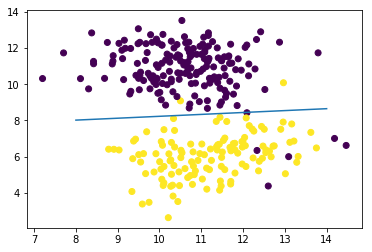

In [43]:
plt.scatter(x[:,0],x[:,1],c=y)
x0 = np.linspace(8,14,1000)
y0 = [sep_line(u) for u in x0]
plt.plot(x0,y0)

## 2. Logistic regression

   ### Quick Data visualization

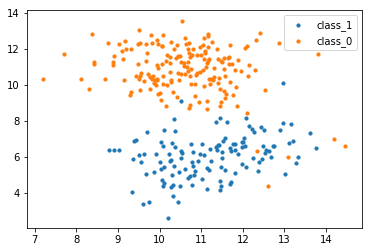

In [44]:
import matplotlib.pyplot as plt 

# X = feature values, all the columns except the last column
X = A_train.iloc[:, :-1]

# y = target values, last column of the data frame
y = A_train.iloc[:, -1]

class_1 = A_train.loc[y == 1]
class_0 = A_train.loc[y == 0]

# plots
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], s=10, label='class_1')
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], s=10, label='class_0')
plt.legend()
plt.show()

$f(x)=w^T x+b \iff f(x)=\tilde{w}^T \begin{pmatrix} x\\ 1\end{pmatrix} $

In [45]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def etha(w,x):
    return sigmoid(np.dot(w.T,x))
def log_likelihood(w, x, y):
    return y*np.dot(w.T,x)+np.log(sigmoid(-np.dot(w.T,x)))
def Grad_l(w,x,y):
    return(y-etha(w,x))*x

in order to find the max of we can either do a gradient descent or use NEwton's method going through the hessian matrix. 
we'll use python's implementation of the BFGS algo ( pseudo-Newton) 

In [46]:
def sample_neg_logl(w,X,Y):
    l=[0]
    for i,x in enumerate(X) : 
        l+=-log_likelihood(w,x,Y[i])
    return l 
def sample_neg_gradlogl(w,X,Y):
    l=[0,0,0]
    for i,x in enumerate(X) : 
        l+=-Grad_l(w,x,Y[i])
    return l 


In [47]:
from scipy.optimize import minimize 
def logistic_reg(X,y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    w0=np.zeros((X.shape[1], 1))
    return minimize(sample_neg_logl,w0,args=(X,y),method='BFGS',jac=sample_neg_gradlogl).x

In [48]:
w_sol=logistic_reg(X,y)
print(w_sol)

[18.80703925 -0.27693433 -1.91419826]


now we can plot $p(y=1|x)=0.5 \iff 0.5=\sigma(w^Tx)\iff w^Tx=0$
$$\\ w= \begin{pmatrix}w_1\\w_2\\w_3\end{pmatrix},\quad x=\begin{pmatrix}1\\x_1\\x_2\end{pmatrix} \implies \quad x_2=-\frac{w_2}{w_3}x1-\frac{w_1}{w_3} $$

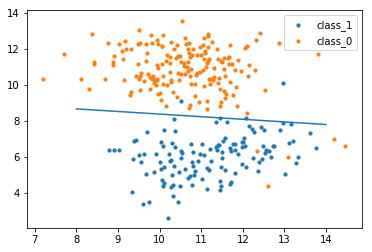

In [49]:
# plots
class_1 = A_train.loc[y == 1]
class_0 = A_train.loc[y == 0]
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], s=10, label='class_1')
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], s=10, label='class_0')
x_1=np.linspace(8,14,100)
x_2=[-w_sol[1]*x/w_sol[2]-w_sol[0]/w_sol[2] for x in x_1]
plt.plot(x_1,x_2)
plt.legend()
plt.show()

### 3. Linear regression

in linear regression (Conditional Model) we model the distribution of X given Y by : 
$$Y|X \sim  \mathcal{N} (w^TX+b,\sigma^2) \quad \iff Y|X \sim  \mathcal{N} (\tilde{w}^T\begin{pmatrix} X\\ 1\end{pmatrix},\sigma^2)$$
$$\hat{w}=(X^TX)^{-1}X^Ty$$

In [50]:

def linear_reg(X,y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    y = y[:, np.newaxis]
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

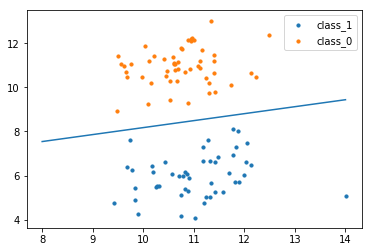

In [51]:
# plots
# X = feature values, all the columns except the last column
A_train=train[0]
X = A_train.iloc[:, :-1]
y = A_train.iloc[:, -1]
class_1 = A_train.loc[y == 1]
class_0 = A_train.loc[y == 0]
# y = target values, last column of the data frame

w_hat =linear_reg(X,y)
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], s=10, label='class_1')
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], s=10, label='class_0')
x_1=np.linspace(8,14,100)
x_2=[-w_hat[1]*x/w_hat[2]-w_hat[0]/w_hat[2]+0.5/w_hat[2] for x in x_1]
plt.plot(x_1,x_2)
plt.legend()
plt.show()

### 4. Application

In [52]:
W_log=[]
W_lin=[]
for i in train :
    X = i.iloc[:, :-1]
    y = i.iloc[:, -1]
    W_log+=[logistic_reg(X,y)]
    W_lin+=[linear_reg(X,y)]


Training error 

In [53]:
y_pred_lin=[]
y_pred_log=[]
y_pred_LDA=[]
Y=[]
for a,i in enumerate(train): 
    x = i.iloc[:, :-1]
    y = i.iloc[:, -1]
    X = np.c_[np.ones((x.shape[0], 1)), x]
    Y += [y[:, np.newaxis]]
    y_pred_lin+=[np.round(np.dot(X,W_lin[a])).astype(int)]
    y_pred_log+=[np.round(sigmoid(np.dot(X,W_log[a]))).astype(int)]
    x_LDA = np.array(train[a].loc[:,0:1],dtype="float")
    y_LDA = np.array(train[a].loc[:,2],dtype="float")
    p = pi_estimator(y_LDA)
    estimator = LDA_estimator(x_LDA,y_LDA)
    LDA = np.array([np.round(one_x_dist(p,estimator,u.reshape((2,1)))).astype(int) for u in x_LDA])
    y_pred_LDA+=[LDA]

from sklearn.metrics import accuracy_score
print('Linear regression  \n')
for i in range(len(y_pred_lin)):
    L='ABC'
    print('Train error on set'+L[i]+' :%.2f '% (1-accuracy_score(Y[i],y_pred_lin[i])))
print('\nlogistic regression  \n')
for i in range(len(y_pred_log)):
    L='ABC'
    print(' Train error on set'+L[i]+' :%.2f '% (1-accuracy_score(Y[i],y_pred_log[i])))
print('\nGenerative Model \n')
for i in range(len(y_pred_LDA)):
    L='ABC'
    print(' Train error on set'+L[i]+' :%.2f '% (1-accuracy_score(Y[i],y_pred_LDA[i])))



Linear regression  

Train error on setA :0.00 
Train error on setB :0.02 
Train error on setC :0.03 

logistic regression  

 Train error on setA :0.00 
 Train error on setB :0.01 
 Train error on setC :0.03 

Generative Model 

 Train error on setA :0.00 
 Train error on setB :0.02 
 Train error on setC :0.03 


error on test 

In [54]:
y_pred_lin=[]
y_pred_log=[]
y_pred_LDA=[]
Y=[]
for a,i in enumerate(test): 
    x = i.iloc[:, :-1]
    y = i.iloc[:, -1]
    X = np.c_[np.ones((x.shape[0], 1)), x]
    Y += [y[:, np.newaxis]]
    y_pred_lin+=[np.round(np.dot(X,W_lin[a])).astype(int)]
    y_pred_log+=[np.round(sigmoid(np.dot(X,W_log[a]))).astype(int)]
    x_LDA = np.array(train[a].loc[:,0:1],dtype="float")
    y_LDA = np.array(train[a].loc[:,2],dtype="float")
    p = pi_estimator(y_LDA)
    estimator = LDA_estimator(x_LDA,y_LDA)
    LDA = np.array([np.round(one_x_dist(p,estimator,u.reshape((2,1)))).astype(int) for u in np.array(test[a].loc[:,0:1],dtype="float")])
    y_pred_LDA+=[LDA]
    
from sklearn.metrics import accuracy_score
print('Linear regression  \n')
for i in range(len(y_pred_lin)):
    L='ABC'
    print('Test error on set'+L[i]+' :%.2f '% (1-accuracy_score(Y[i],y_pred_lin[i])))
print('\nlogistic regression  \n')
for i in range(len(y_pred_log)):
    L='ABC'
    print(' Test error on set'+L[i]+' :%.2f '% (1-accuracy_score(Y[i],y_pred_log[i])))
print('\nGenerative Model \n')
for i in range(len(y_pred_LDA)):
    L='ABC'
    print(' Test error on set'+L[i]+' :%.2f '% (1-accuracy_score(Y[i],y_pred_LDA[i])))



Linear regression  

Test error on setA :0.01 
Test error on setB :0.06 
Test error on setC :0.04 

logistic regression  

 Test error on setA :0.01 
 Test error on setB :0.04 
 Test error on setC :0.05 

Generative Model 

 Test error on setA :0.01 
 Test error on setB :0.05 
 Test error on setC :0.04 


Obviously, training error is lower than test error, which totally normal since the model is trying to predict the labels of data that it has never seen before. 
Performance of the three models on both training and test datasets is very similar with a slight performance increase for logistic regression on data set B , and a slight performance increase for linear regression and the Generative model on data set C 

### 5. QDA model

        a. Please find the determination of the estimators in the joined PDF

In [55]:
A_train=train[2]
x = np.array(A_train.loc[:,0:1],dtype="float")
y = np.array(A_train.loc[:,2],dtype="float")

def QDA_estimator(x,y):
    Nu_0 = np.array([0,0],dtype="float").reshape((2,1))
    Nu_1 = np.array([0,0],dtype="float").reshape((2,1))
    sigma_1 = np.array([[0,0],
                      [0,0]],dtype="float")
    sigma_0 = np.array([[0,0],
                      [0,0]],dtype="float")
    A=0
    B=0
    for k in range(len(y)):
        xk = x[k].reshape((2,1))
        Nu_0[0] = Nu_0[0] + (1-y[k])*x[k,0]
        Nu_0[1] = Nu_0[1] + (1-y[k])*x[k,1]
        Nu_1[0] = Nu_1[0] + y[k]*x[k,0]
        Nu_1[1] = Nu_1[1] + y[k]*x[k,1]
        sigma_0 = sigma_0 + (1-y[k])*np.dot(xk-Nu_0,np.transpose(xk-Nu_0))
        sigma_1 = sigma_1 + y[k]*np.dot(xk-Nu_1,np.transpose(xk-Nu_1))
        A = A + (1-y[k])
        B = B + y[k]
    Nu_0[0] = Nu_0[0]/A
    Nu_0[1] = Nu_0[1]/A
    sigma_0 = sigma_0/A
    Nu_1[0] = Nu_1[0]/B
    Nu_1[1] = Nu_1[1]/B
    sigma_1 = sigma_1/B

    
    return(Nu_0,Nu_1,sigma_0,sigma_1)

Nu_0,Nu_1,sigma_0,sigma_1 = QDA_estimator(x,y)



In [56]:
def one_x_dist_QDA(p,estimator,x):
    Nu_0,Nu_1,sigma_0,sigma_1 = estimator
    return(p*Gauss(Nu_1,sigma_1,x)/(p*Gauss(Nu_1,sigma_1,x)+(1-p)*Gauss(Nu_0,sigma_0,x)))

In [57]:
p = pi_estimator(y)
estimator = QDA_estimator(x,y)
def sep_line(u):
    f = lambda v: one_x_dist_QDA(p,estimator,np.array([u,v]).reshape((2,1)))
    return(inversefunc(f, y_values=0.5))

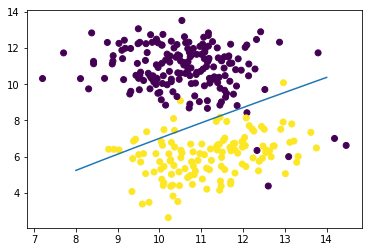

In [58]:
plt.scatter(x[:,0],x[:,1],c=y)
x0 = np.linspace(8,14,1000)
y0 = [sep_line(u) for u in x0]
plt.plot(x0,y0)

In [59]:
y_pred_QDA=[]
Y=[]
for a,i in enumerate(train): 
    y = i.iloc[:, -1]
    Y += [y[:, np.newaxis]]
    x_QDA = np.array(train[a].loc[:,0:1],dtype="float")
    y_QDA = np.array(train[a].loc[:,2],dtype="float")
    p = pi_estimator(y_QDA)
    estimator = QDA_estimator(x_QDA,y_QDA)
    QDA = np.array([np.round(one_x_dist_QDA(p,estimator,u.reshape((2,1)))).astype(int) for u in x_QDA])
    y_pred_QDA+=[QDA]

from sklearn.metrics import accuracy_score
print('QDA Model  \n')
for i in range(len(y_pred_QDA)):
    L='ABC'
    print('Train error on set'+L[i]+' :%.2f '% (1-accuracy_score(Y[i],y_pred_QDA[i])))


QDA Model  

Train error on setA :0.00 
Train error on setB :0.03 
Train error on setC :0.06 


In [60]:
y_pred_QDA=[]
Y=[]
for a,i in enumerate(test): 
    y = i.iloc[:, -1]
    Y += [y[:, np.newaxis]]
    x_QDA = np.array(train[a].loc[:,0:1],dtype="float")
    y_QDA = np.array(train[a].loc[:,2],dtype="float")
    p = pi_estimator(y_QDA)
    estimator = QDA_estimator(x_QDA,y_QDA)
    QDA = np.array([np.round(one_x_dist_QDA(p,estimator,u.reshape((2,1)))).astype(int) for u in np.array(test[a].loc[:,0:1],dtype="float")])
    y_pred_QDA+=[QDA]

from sklearn.metrics import accuracy_score
print('QDA Model  \n')
for i in range(len(y_pred_QDA)):
    L='ABC'
    print('Test error on set'+L[i]+' :%.2f '% (1-accuracy_score(Y[i],y_pred_QDA[i])))


QDA Model  

Test error on setA :0.01 
Test error on setB :0.06 
Test error on setC :0.06 


The QDA model's performance is lower than all the other models (LDA, logistic and linear regression) in both training and test in all sets. This is interesting as we may think that it should perform better than LDA as it's a more general model. This can be explained by the fact that the variance characteristic is common for both classes 0 and 1 and should then be learned accross all inputs x independently from their classes.